In [3]:
#biblioteki 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#inne informacje
#gęstość piany z mydła 0.1-0.3 g/cm^3

#stałe
G = 9.8 #przyspieszenie grawitacyjne

In [4]:
def speedFoam(R0, u0, h0):
    return 2*np.pi*R0*u0*h0

def heightStart(V, R0, beta, t):
    main = ((27*V**3)/(4*np.pi**3*beta**2*R0**2))
    h0 = (main**(1/7))*t**(1/7)
    return h0

def radiusRes(beta, R0, V, t):
    main = ((18*beta*R0*V**2)/(np.pi**2))**(1/7)
    R = main * t**(3/7)
    return R

def factorBeta(rho, S = 0.1, kf = 0.1):
    """Wylicz i zwróć parametr tarcia beta
    ----------------------------------------
    S - gęstość cieczy przez gęśtość piany
    kf - współczynnik tarcia
    rho - gestośc piany"""
    return rho*G*(1-1/S)/kf


In [25]:
# pierwsza symulacja

S = 5
beta = factorBeta(200, S)
V = 0.634  
R0 = 1  
dt = 0.05 
h0 = 0

print(beta)

MovieWriter ffmpeg unavailable; using Pillow instead.


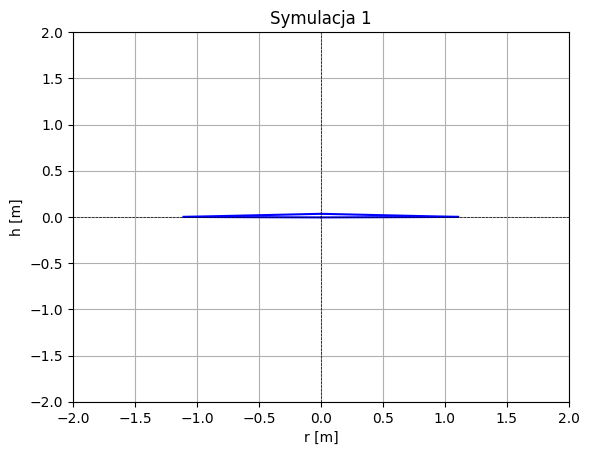

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Inicjalizacja wykresu
fig, ax = plt.subplots()


# Inicjalizacja linii wykresu
line1, = ax.plot(0, 0, color = "blue")
line2, = ax.plot(0, 0, color = "blue")
line3, = ax.plot(0, 0, color = "blue")
line4, = ax.plot(0, 0, color = "blue")


# Funkcja aktualizująca wykres w każdej klatce animacji
def update(frame):
    # Aktualizacja danych
    x = radiusRes(beta, R0, V, dt*frame)
    y = heightStart(V, R0, beta, dt*frame)

    line1.set_data([0, x], [y*(1-1/S), 0])
    line2.set_data([0, x], [-y*(1/S), 0])
    line3.set_data([0, -x], [y*(1-1/S), 0])
    line4.set_data([0, -x], [-y*(1/S), 0])
 

    return line1, line2, line3, line4

# Utworzenie animacji
ani = animation.FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Wyświetlenie animacji
#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.title("Symulacja 1")
plt.xlabel("r [m]")
plt.ylabel("h [m]")
plt.grid()
plt.axhline(0, color='black', linestyle='--', linewidth = 0.5 )
plt.axvline(0, color='black', linestyle='--', linewidth = 0.5 )
ani.save('foam_anim2d3.gif')
plt.show()




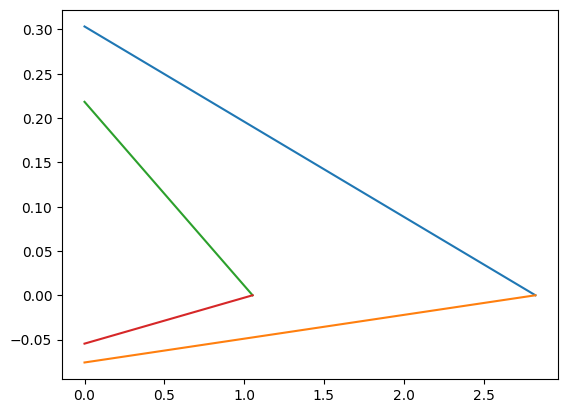

In [17]:
frame = 100
frame1 = 10

x = radiusRes(beta, R0, V, dt*frame)
y = heightStart(V, R0, beta, dt*frame)
plt.plot([0, x], [y*(1-1/S), 0])
plt.plot([0, x], [-y*(1/S), 0])

x = radiusRes(beta, R0, V, dt*frame1)
y = heightStart(V, R0, beta, dt*frame1)
plt.plot([0, x], [y*(1-1/S), 0])
plt.plot([0, x], [-y*(1/S), 0])

plt.show()
